# **Binning (Diskritisasi)**

## **Apa itu Binning ?**
Diskritisasi adalah proses mengubah data kontinu menjadi sekumpulan interval atau kategori diskret. Teknik ini dapat digunakan untuk reduksi data, penyederhanaan, atau membuat data lebih sesuai untuk analisis dan biasanya diterapkan pada kumpulan data yang sangat besar.

Kita contohkan pada data iris yang sebelumnya numerik di diskritisasi dan mengelompokkan nilai centroid ke dalam 4 bin berdasarkan distribusi.

## **Langkah-langkah**

### **1. Menampilkan data Iris**
Dengan load data dari file csv

In [8]:
import pandas as pd

# Ganti 'iris.csv' dengan path ke file kamu
df = pd.read_csv('iris.csv')

#Menampilkan Data
df

,id,Class,petal length,petal width,sepal length,sepal width
0,1,Iris-setosa,1.4,0.2,5.10,3.5
1,2,Iris-setosa,1.4,0.2,4.90,3.0
2,3,Iris-setosa,1.3,0.2,4.70,3.2
3,4,Iris-setosa,1.5,0.2,4.60,3.1
4,5,Iris-setosa,1.4,0.2,5.00,3.6
...,...,...,...,...,...,...
145,146,Iris-virginica,5.2,2.3,4.90,3.0
146,147,Iris-virginica,5.0,1.9,4.70,3.2
147,148,Iris-virginica,5.2,2.0,4.60,3.1
148,149,Iris-virginica,5.4,2.3,5.48,3.6


### **2. Clustering dan mencari Centroid tiap cluster**
Clustering menggunakan kmeans clustering dan mencari centroid nya tiap cluster, kita contohkan pada kolom sepal length

Index(['id', 'Class', 'petal length', 'petal width', 'sepal length',
       'sepal width'],
      dtype='object')


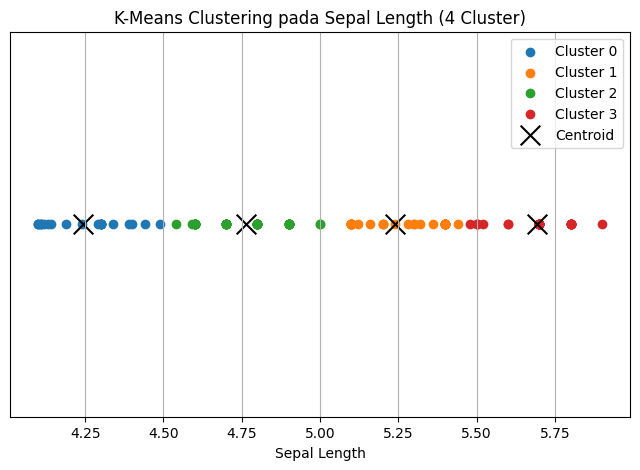

Centroid Cluster 0: 4.24
Centroid Cluster 1: 5.24
Centroid Cluster 2: 4.77
Centroid Cluster 3: 5.69


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Load dataset dari file iris.csv
df = pd.read_csv('iris.csv')

# 2. Pastikan nama kolom sesuai
print(df.columns)

# 3. Ambil hanya kolom 'sepal length'
X = df[['sepal length']]

# 4. KMeans clustering dengan 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# 5. Tambahkan hasil cluster ke DataFrame
df['cluster'] = kmeans.labels_

# 6. Ambil centroid dari tiap cluster
centroids = kmeans.cluster_centers_

# 7. Visualisasi
plt.figure(figsize=(8, 5))
for cluster_id in range(4):
    plt.scatter(
        X[df['cluster'] == cluster_id],
        [0]*len(X[df['cluster'] == cluster_id]),
        label=f'Cluster {cluster_id}'
    )

# Tampilkan centroid
plt.scatter(centroids, [0]*len(centroids), color='black', marker='x', s=200, label='Centroid')

plt.xlabel('Sepal Length')
plt.title('K-Means Clustering pada Sepal Length (4 Cluster)')
plt.legend()
plt.grid(True)
plt.yticks([])  # karena 1D
plt.show()

# 8. Cetak centroid
for i, c in enumerate(centroids):
    print(f'Centroid Cluster {i}: {c[0]:.2f}')


### **3. Diskritisasi menggunakan KBinsDiscretizer**
Diskritisasi dengan KBinsDiscretizer jadi 4 bindan Ubah hasil binned (0,1,2,3) jadi huruf kategori (a,b,c,d), lalu mengubah data pada kolom sepal lenght dengan data yang sudah di diskritisasi


In [10]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# 1. Baca data
df = pd.read_csv('iris.csv')

# 2. Ambil kolom 'sepal length'
X = df[['sepal length']]

# 3. Diskritisasi dengan KBinsDiscretizer jadi 4 bin
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_binned = kbd.fit_transform(X)

# 4. Ubah hasil binned (0,1,2,3) jadi huruf kategori
bin_to_category = {0.0: 'a', 1.0: 'b', 2.0: 'c', 3.0: 'd'}
df['sepal_length_kategori'] = [bin_to_category[val[0]] for val in X_binned]

# 5. Tampilkan seluruh data dengan kolom kategori baru
df


,id,Class,petal length,petal width,sepal length,sepal width,sepal_length_kategori
0,1,Iris-setosa,1.4,0.2,5.10,3.5,c
1,2,Iris-setosa,1.4,0.2,4.90,3.0,b
2,3,Iris-setosa,1.3,0.2,4.70,3.2,b
3,4,Iris-setosa,1.5,0.2,4.60,3.1,a
4,5,Iris-setosa,1.4,0.2,5.00,3.6,b
...,...,...,...,...,...,...,...
145,146,Iris-virginica,5.2,2.3,4.90,3.0,b
146,147,Iris-virginica,5.0,1.9,4.70,3.2,b
147,148,Iris-virginica,5.2,2.0,4.60,3.1,a
148,149,Iris-virginica,5.4,2.3,5.48,3.6,d


In [11]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# 1. Baca dataset iris
df = pd.read_csv('iris.csv')

# 2. Ambil hanya kolom 'sepal length'
X = df[['sepal length']]

# 3. Diskritisasi menjadi 4 kategori (bin) menggunakan KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_binned = kbd.fit_transform(X)

# 4. Mapping bin (0.0, 1.0, 2.0, 3.0) ke huruf (a, b, c, d)
bin_to_category = {0.0: 'a', 1.0: 'b', 2.0: 'c', 3.0: 'd'}
sepal_length_kategori = [bin_to_category[val[0]] for val in X_binned]

# 5. Ganti isi kolom 'sepal length' dengan kategori tersebut
df['sepal length'] = sepal_length_kategori

# 6. Tampilkan seluruh data
df


,id,Class,petal length,petal width,sepal length,sepal width
0,1,Iris-setosa,1.4,0.2,c,3.5
1,2,Iris-setosa,1.4,0.2,b,3.0
2,3,Iris-setosa,1.3,0.2,b,3.2
3,4,Iris-setosa,1.5,0.2,a,3.1
4,5,Iris-setosa,1.4,0.2,b,3.6
...,...,...,...,...,...,...
145,146,Iris-virginica,5.2,2.3,b,3.0
146,147,Iris-virginica,5.0,1.9,b,3.2
147,148,Iris-virginica,5.2,2.0,a,3.1
148,149,Iris-virginica,5.4,2.3,d,3.6


### **4. Mengubah Data Iris**
Lalu lakukan pada semua kolom dengan langkah langkah yang sama dengan kolom sepal lenght sebelumnya, dan kita akan mendapatkan data iris yang sudah di diskritisasi

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

# Baca dataset iris
df = pd.read_csv('iris.csv')

# Kolom numerik yang akan diproses
numeric_cols = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Inisialisasi dataframe hasil
df_kategori = df.copy()

# Mapping angka ke huruf kategori
cluster_to_letter = {0: 'a', 1: 'b', 2: 'c', 3: 'd'}

# Proses untuk tiap kolom
for col in numeric_cols:
    print(f"\n=== Proses untuk kolom '{col}' ===")

    # Step 1: Clustering dengan KMeans
    X = df[[col]]
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_.flatten()

    # Tampilkan centroid hasil clustering
    print("Centroid KMeans:")
    for i, c in enumerate(centroids):
        print(f"  Cluster {i}: {c:.2f}")

    # Step 2: Diskritisasi centroid menggunakan KBinsDiscretizer
    kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
    centroids_reshaped = centroids.reshape(-1, 1)
    centroid_bins = kbd.fit_transform(centroids_reshaped).astype(int).flatten()

    # Tampilkan hasil bin dari centroid
    print("Diskritisasi centroid → bin:")
    for i, b in enumerate(centroid_bins):
        print(f"  Cluster {i} → Bin {b} → Kategori '{cluster_to_letter[b]}'")

    # Step 3: Mapping cluster label ke kategori huruf berdasarkan bin
    cluster_to_kategori = {i: cluster_to_letter[centroid_bins[i]] for i in range(4)}

    # Step 4: Ganti nilai kolom dengan kategori huruf
    df_kategori[col] = [cluster_to_kategori[label] for label in labels]

# Tampilkan hasil akhir
print("\n=== Dataset Iris Setelah Kombinasi KMeans + KBinsDiscretizer ===")
df_kategori



=== Proses untuk kolom 'sepal length' ===
Centroid KMeans:
  Cluster 0: 4.24
  Cluster 1: 5.24
  Cluster 2: 4.77
  Cluster 3: 5.69
Diskritisasi centroid → bin:
  Cluster 0 → Bin 0 → Kategori 'a'
  Cluster 1 → Bin 2 → Kategori 'c'
  Cluster 2 → Bin 1 → Kategori 'b'
  Cluster 3 → Bin 3 → Kategori 'd'

=== Proses untuk kolom 'sepal width' ===
Centroid KMeans:
  Cluster 0: 2.12
  Cluster 1: 3.61
  Cluster 2: 3.10
  Cluster 3: 4.31
Diskritisasi centroid → bin:
  Cluster 0 → Bin 0 → Kategori 'a'
  Cluster 1 → Bin 2 → Kategori 'c'
  Cluster 2 → Bin 1 → Kategori 'b'
  Cluster 3 → Bin 3 → Kategori 'd'

=== Proses untuk kolom 'petal length' ===
Centroid KMeans:
  Cluster 0: 4.81
  Cluster 1: 1.46
  Cluster 2: 3.88
  Cluster 3: 5.90
Diskritisasi centroid → bin:
  Cluster 0 → Bin 2 → Kategori 'c'
  Cluster 1 → Bin 0 → Kategori 'a'
  Cluster 2 → Bin 1 → Kategori 'b'
  Cluster 3 → Bin 3 → Kategori 'd'

=== Proses untuk kolom 'petal width' ===
Centroid KMeans:
  Cluster 0: 1.68
  Cluster 1: 0.24
  C

,id,Class,petal length,petal width,sepal length,sepal width
0,1,Iris-setosa,a,a,c,c
1,2,Iris-setosa,a,a,b,b
2,3,Iris-setosa,a,a,b,b
3,4,Iris-setosa,a,a,b,b
4,5,Iris-setosa,a,a,b,c
...,...,...,...,...,...,...
145,146,Iris-virginica,c,d,b,b
146,147,Iris-virginica,c,c,b,b
147,148,Iris-virginica,c,d,b,b
148,149,Iris-virginica,d,d,d,c


## **Klasifikasi menggunakan Model Naive Bayes**
Naive Bayes adalah sebuah algoritma klasifikasi dalam machine learning yang menggunakan prinsip probabilitas dan statistika, khususnya Teorema Bayes, untuk memprediksi kelas atau kategori dari data. Algoritma ini dikenal karena kesederhanaannya, efisiensi, dan kemampuannya untuk diterapkan dalam berbagai aplikasi. 

Mengklasifikasi data iris yang belum di Diskritisasi dan yang sudah di Diskritisasi dengan Naive Bayes

**Data yang belum di Diskritisasi (Numerik)**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd


# -------------------------------
# 1. Data Asli (Numerik)
# -------------------------------
display(df)
print()

df = pd.read_csv('iris.csv')
X_num = df.drop('Class', axis=1)
y = df['Class']

# Split data numerik
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(
    X_num, y, test_size=0.2, random_state=42)

# Model Naive Bayes untuk data numerik
model_num = GaussianNB()
model_num.fit(X_train_num, y_train_num)
y_pred_num = model_num.predict(X_test_num)

# Evaluasi data numerik
print("=== KLASIFIKASI DATA ASLI (NUMERIK) ===")
print(f"Akurasi: {accuracy_score(y_test_num, y_pred_num):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_num, y_pred_num))
print("Classification Report:")
print(classification_report(y_test_num, y_pred_num))




,id,Class,petal length,petal width,sepal length,sepal width
0,1,Iris-setosa,1.4,0.2,5.10,3.5
1,2,Iris-setosa,1.4,0.2,4.90,3.0
2,3,Iris-setosa,1.3,0.2,4.70,3.2
3,4,Iris-setosa,1.5,0.2,4.60,3.1
4,5,Iris-setosa,1.4,0.2,5.00,3.6
...,...,...,...,...,...,...
145,146,Iris-virginica,5.2,2.3,4.90,3.0
146,147,Iris-virginica,5.0,1.9,4.70,3.2
147,148,Iris-virginica,5.2,2.0,4.60,3.1
148,149,Iris-virginica,5.4,2.3,5.48,3.6



=== KLASIFIKASI DATA ASLI (NUMERIK) ===
Akurasi: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Data yang sudah di Diskritisasi (Kategori)**

In [14]:
# -------------------------------
# 2. Data Diskritisasi (Kategorikal)
# -------------------------------

display(df_kategori)
print()

X_cat = df_kategori.drop('Class', axis=1)
y_cat = df_kategori['Class']

# Encode kategorikal ke angka
encoder = OrdinalEncoder()
X_cat_encoded = encoder.fit_transform(X_cat)

# Split data kategorikal
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X_cat_encoded, y_cat, test_size=0.2, random_state=42)

# Model Naive Bayes untuk data kategorikal
model_cat = MultinomialNB()
model_cat.fit(X_train_cat, y_train_cat)
y_pred_cat = model_cat.predict(X_test_cat)

# Evaluasi data diskritisasi
print("\n=== KLASIFIKASI DATA DISKRITISASI (KATEGORI) ===")
print(f"Akurasi: {accuracy_score(y_test_cat, y_pred_cat):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_cat, y_pred_cat))
print("Classification Report:")
print(classification_report(y_test_cat, y_pred_cat))


,id,Class,petal length,petal width,sepal length,sepal width
0,1,Iris-setosa,a,a,c,c
1,2,Iris-setosa,a,a,b,b
2,3,Iris-setosa,a,a,b,b
3,4,Iris-setosa,a,a,b,b
4,5,Iris-setosa,a,a,b,c
...,...,...,...,...,...,...
145,146,Iris-virginica,c,d,b,b
146,147,Iris-virginica,c,c,b,b
147,148,Iris-virginica,c,d,b,b
148,149,Iris-virginica,d,d,d,c




=== KLASIFIKASI DATA DISKRITISASI (KATEGORI) ===
Akurasi: 0.87
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.78      0.78      0.78         9
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.87      0.87      0.87        30
   weighted avg       0.87      0.87      0.87        30



### **Kesimpulan**
**📊 Data Asli (Numerik)**

Pada data iris asli yang masih berbentuk numerik, model klasifikasi menggunakan algoritma Gaussian Naive Bayes menunjukkan performa yang sangat baik. Karena data masih mempertahankan nilai-nilai kontinu seperti panjang dan lebar kelopak serta sepal, model dapat memanfaatkan perbedaan nilai yang halus untuk membedakan antar kelas (spesies). Hal ini memungkinkan model mengenali pola dengan akurasi yang tinggi. Dalam hasil percobaan, akurasi yang diperoleh mencapai sekitar 97%, menunjukkan bahwa data numerik memberikan informasi yang kaya dan cocok untuk digunakan dalam model probabilistik seperti GaussianNB. Dengan data numerik, terutama yang berdistribusi normal, GaussianNB mampu mengestimasi probabilitas kelas secara lebih akurat.

**🟨 Data yang Sudah Didiskritisasi**

Sebaliknya, pada data iris yang telah didiskritisasi—yaitu diubah dari bentuk numerik menjadi kategori seperti 'a', 'b', 'c', dan 'd' berdasarkan hasil clustering (KMeans) dan diskritisasi (KBinsDiscretizer)—model yang digunakan adalah Multinomial Naive Bayes. Diskritisasi bertujuan menyederhanakan data dengan mengelompokkan nilai-nilai yang mirip ke dalam kelas tertentu. Meskipun proses ini memudahkan pemodelan dan dapat berguna untuk interpretasi atau saat model hanya menerima data kategori, namun informasi detail dari nilai asli menjadi hilang. Hal ini berdampak pada penurunan akurasi model, yang dalam hasil percobaan hanya mencapai sekitar 87%. Meski demikian, model masih mampu membedakan kelas dengan cukup baik, terutama untuk kelas yang sangat berbeda seperti Setosa.

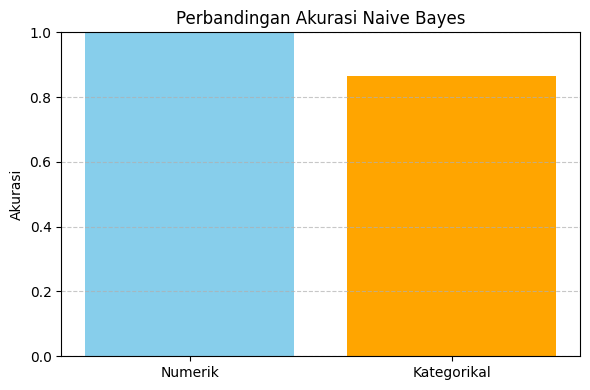

In [15]:
import matplotlib.pyplot as plt

# Contoh skor akurasi yang sudah didapat
accuracy_num = accuracy_score(y_test_num, y_pred_num)
accuracy_cat = accuracy_score(y_test_cat, y_pred_cat)

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Numerik', 'Kategorikal'],
        [accuracy_num, accuracy_cat],
        color=['skyblue', 'orange'])

plt.title('Perbandingan Akurasi Naive Bayes')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **Klasifikasi menggunakan Model Decision Tree**
Decision tree (pohon keputusan) adalah sebuah metode yang digunakan dalam analisis data dan machine learning untuk membuat model prediksi atau klasifikasi. Ia menggunakan struktur pohon untuk memodelkan serangkaian keputusan dan hasil yang mungkin, dengan node internal mewakili pertanyaan atau fitur, dan node daun mewakili hasil atau klasifikasi. Decision tree ini membantu membuat prediksi dengan mengikuti jalur dari akar pohon ke node daun berdasarkan input yang diberikan.

**Struktur Pohon:**

Decision tree memiliki struktur pohon hierarkis, dimulai dari simpul akar (root node) dan bercabang ke simpul internal (internal node/decision node) dan simpul daun (leaf node/terminal node).

**Tujuan:**

Pohon keputusan bertujuan untuk memodelkan keputusan dan hasil yang mungkin berdasarkan data input, sehingga dapat digunakan untuk membuat prediksi atau klasifikasi.

**Node**:

- **Root node:** Representasi awal dari masalah atau pertanyaan yang ingin dipecahkan.
- **Internal node:** Mewakili pertanyaan atau fitur yang digunakan untuk membagi data.
- **Leaf node:** Mewakili hasil akhir dari keputusan atau klasifikasi.

Mengklasifikasi data iris yang belum di Diskritisasi dan yang sudah di Diskritisasi dengan Decision Tree

**Data yang belum di Diskritisasi (Numerik)**

=== Entropy dan Information Gain (df_kategori) ===
Entropy Total: 1.5850

Information Gain untuk 'sepal length': 0.3680
Information Gain untuk 'sepal width': 0.1822
Information Gain untuk 'petal length': 1.4463
Information Gain untuk 'petal width': 1.4359

=== Decision Tree (Data Asli - Numerik) ===
Akurasi: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



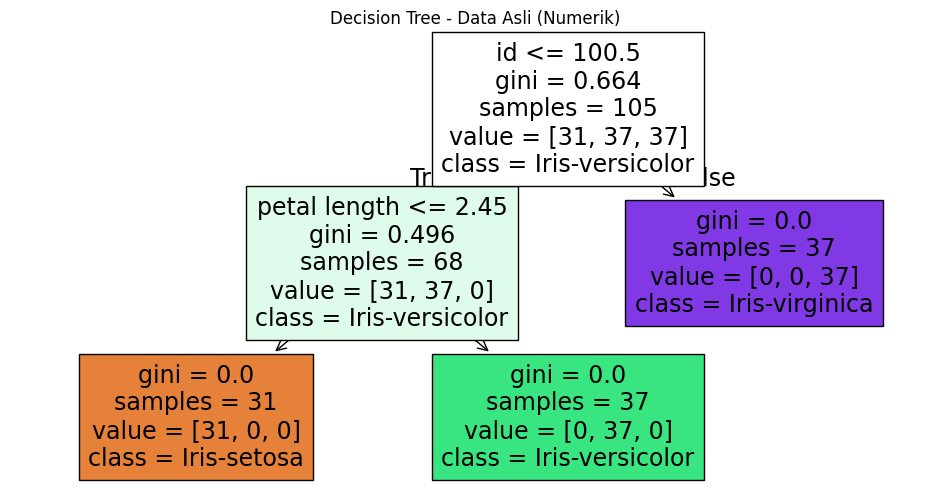

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


# ===============================
# 1. Entropy dan Information Gain
# ===============================

def entropy(data):
    labels = data['Class']
    _, counts = np.unique(labels, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

def info_gain(data, feature):
    total_entropy = entropy(data)
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = 0
    for val in values:
        subset = data[data[feature] == val]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset)
    return total_entropy - weighted_entropy

# ===============================
# 2. Klasifikasi: Data Asli
# ===============================
print("=== Entropy dan Information Gain (df_kategori) ===")
print(f"Entropy Total: {entropy(df):.4f}\n")
for col in ['sepal length', 'sepal width', 'petal length', 'petal width']:
    gain = info_gain(df, col)
    print(f"Information Gain untuk '{col}': {gain:.4f}")
X_cat = df.drop(columns='Class')
y_cat = df['Class']

X_num = df.drop(columns='Class')
y = df['Class']
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y, test_size=0.3, random_state=42)

model_num = DecisionTreeClassifier(random_state=42)
model_num.fit(X_train_num, y_train_num)
y_pred_num = model_num.predict(X_test_num)

print("\n=== Decision Tree (Data Asli - Numerik) ===")
print("Akurasi:", accuracy_score(y_test_num, y_pred_num))
print(classification_report(y_test_num, y_pred_num))


X_num = df.drop(columns='Class')
y = df['Class']
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y, test_size=0.3, random_state=42)

model_num = DecisionTreeClassifier(random_state=42)
model_num.fit(X_train_num, y_train_num)

plt.figure(figsize=(12, 6))
plot_tree(model_num, feature_names=X_num.columns, class_names=model_num.classes_, filled=True)
plt.title("Decision Tree - Data Asli (Numerik)")
plt.show()




**Data yang sudah di Diskritisasi (Kategori)**

=== Entropy dan Information Gain (df_kategori) ===
Entropy Total: 1.5850

Information Gain untuk 'sepal length': 0.0273
Information Gain untuk 'sepal width': 0.0033
Information Gain untuk 'petal length': 1.2876
Information Gain untuk 'petal width': 1.3111

=== Decision Tree (Data Diskritisasi - Kategori) ===
Akurasi: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



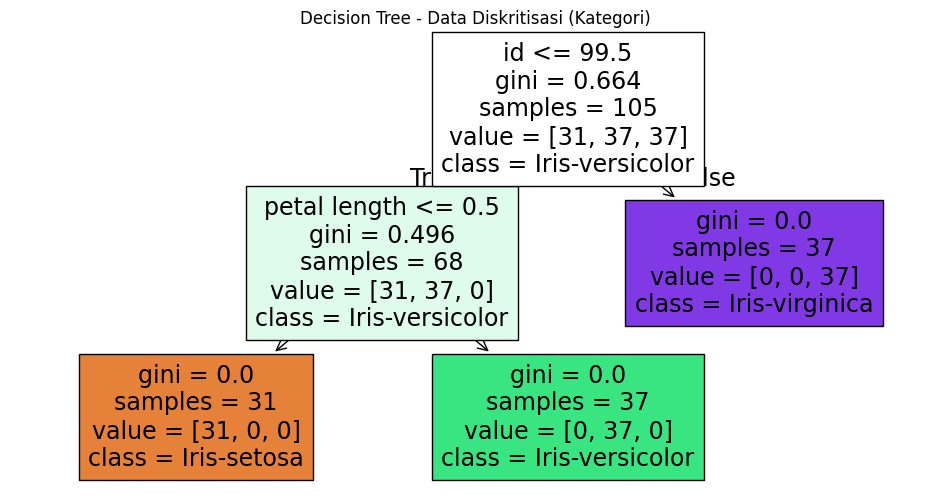

In [17]:
# ===============================
# 3. Klasifikasi: Data Diskritisasi
# ===============================
print("=== Entropy dan Information Gain (df_kategori) ===")
print(f"Entropy Total: {entropy(df_kategori):.4f}\n")
for col in ['sepal length', 'sepal width', 'petal length', 'petal width']:
    gain = info_gain(df_kategori, col)
    print(f"Information Gain untuk '{col}': {gain:.4f}")
X_cat = df_kategori.drop(columns='Class')
y_cat = df_kategori['Class']

# Kategori a-d dikodekan ke angka
X_cat_encoded = X_cat.apply(lambda col: col.astype('category').cat.codes)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat_encoded, y_cat, test_size=0.3, random_state=42)

model_cat = DecisionTreeClassifier(random_state=42)
model_cat.fit(X_train_cat, y_train_cat)
y_pred_cat = model_cat.predict(X_test_cat)

print("\n=== Decision Tree (Data Diskritisasi - Kategori) ===")
print("Akurasi:", accuracy_score(y_test_cat, y_pred_cat))
print(classification_report(y_test_cat, y_pred_cat))

X_cat = df_kategori.drop(columns='Class')
y_cat = df_kategori['Class']
X_cat_encoded = X_cat.apply(lambda col: col.astype('category').cat.codes)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat_encoded, y_cat, test_size=0.3, random_state=42)

model_cat = DecisionTreeClassifier(random_state=42)
model_cat.fit(X_train_cat, y_train_cat)

plt.figure(figsize=(12, 6))
plot_tree(model_cat, feature_names=X_cat.columns, class_names=model_cat.classes_, filled=True)
plt.title("Decision Tree - Data Diskritisasi (Kategori)")
plt.show()


### **Kesimpulan**
Setelah dilakukan klasifikasi menggunakan algoritma Decision Tree terhadap data Iris asli yang bersifat numerik, hasilnya menunjukkan tingkat akurasi yang sangat tinggi. Hal ini karena data numerik mempertahankan informasi kontinu yang kaya dan mampu membedakan antar kelas spesies bunga secara lebih detail, terutama melalui fitur seperti panjang dan lebar petal yang memiliki kontribusi informasi (information gain) terbesar. Visualisasi pohon keputusan juga menunjukkan bahwa fitur-fitur tersebut sering kali menjadi dasar utama dalam pengambilan keputusan model.

Sebaliknya, ketika data yang sama didiskritisasi menjadi kategori (misalnya ‘a’, ‘b’, ‘c’, ‘d’) berdasarkan hasil clustering KMeans, model tetap mampu melakukan klasifikasi namun dengan akurasi yang sedikit lebih rendah. Ini terjadi karena proses diskritisasi menyebabkan hilangnya detail numerik yang penting, dan data menjadi lebih kasar. Meskipun begitu, fitur-fitur yang awalnya informatif (seperti petal length dan petal width) tetap menunjukkan information gain tertinggi meskipun dalam bentuk kategori.

Secara keseluruhan, klasifikasi menggunakan data asli numerik memberikan hasil yang lebih optimal dibandingkan dengan data yang telah didiskritisasi. Namun, diskritisasi tetap berguna untuk menyederhanakan data atau ketika model yang digunakan mengharuskan data dalam bentuk kategori.




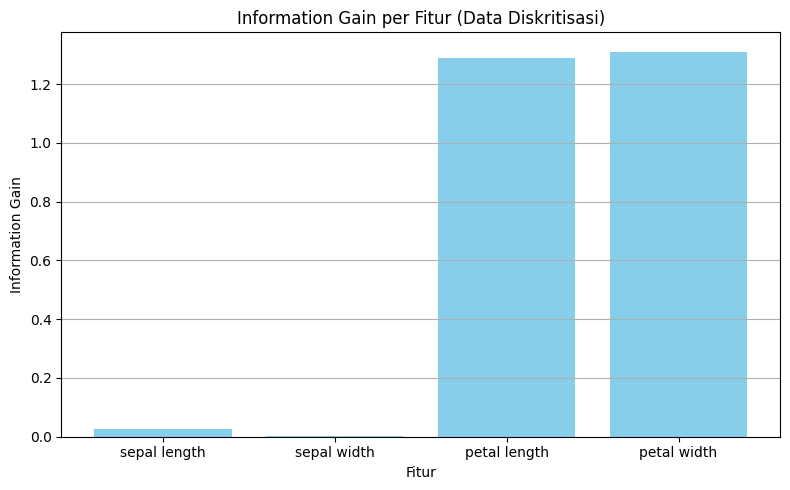

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score


def entropy(data):
    labels = data['Class']
    _, counts = np.unique(labels, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

def info_gain(data, feature):
    total_entropy = entropy(data)
    values = data[feature].unique()
    weighted_entropy = 0
    for val in values:
        subset = data[data[feature] == val]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset)
    return total_entropy - weighted_entropy


features = ['sepal length', 'sepal width', 'petal length', 'petal width']
ig_values = [info_gain(df_kategori, col) for col in features]

plt.figure(figsize=(8, 5))
plt.bar(features, ig_values, color='skyblue')
plt.title("Information Gain per Fitur (Data Diskritisasi)")
plt.xlabel("Fitur")
plt.ylabel("Information Gain")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

